# Comparison of FEP predictions to experimental measurements

On May 10, 2020, the COVID Moonshot team released experimental affinity measurements for the first round of compounds that were ordered.  See:  https://discuss.postera.ai/t/data-release-2020-05-10/1318

While FEP calculations from Folding@home were not used to select these compounds (instead our goal is to help screen future rounds), many of these compounds are ones that we are simulating, enabling a comparison of our predictions so far.

### First, let's find the set of compounds for which both simulations and  experimental measurements exist

Matt Robinson posted a `moonshot_initial_activity_data.csv` file of the initial activity data:

In [40]:
import numpy as np
import pandas as pd
df_activity = pd.read_csv('moonshot_initial_activity_data.csv')

In [41]:

def febkT_to_KD(febkT, dG_rest=2.0, box_length=8.2947):
    """Converts our febkT value to a K_D value in (M = mol/L).
    
    INPUT
    febkT      - our febkT score (in kT)
    
    PARAMETERS
    dG_rest    - the free energy of *restraining* the ligand (in kT)
                 NOTE: this should be a positive number
    box_length - the simulated PBC box length (in nm).
                 NOTE: a cubic box is assumed
    
    RETURNS
    K_D      - the estimated K_D value (in M)"""
    
    # Convert the box length to a simulated concentration
    N_A = 6.022e23
    V_0 = (box_length/1.0e8)**3   # in dm^3 = L
    simulated_conc = 1.0/(N_A*V_0)

    dG_standard = febkT - dG_rest + np.log(simulated_conc)
    K_D = np.exp(dG_standard)
    
    return K_D


### IC50 measurements

In [42]:
# Find all that have IC50 data
IC50_measured = pd.notnull(df_activity["IC50 (µM)"]) 
df_activity[IC50_measured]

,SMILES,AVG % Inhibition at 20 uM,AVG % Inhibition at 50 uM,IC50 (µM),Trypsin IC50 (µM),CID
19,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,61.60,81.8,25.4,> 49.5,TRY-UNI-714a760b-6
22,Cc1ccncc1NC(=O)C(C)c1cccc(C#N)c1,35.40,61.4,55.2,> 99.0,TRY-UNI-714a760b-22
23,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,33.60,58.3,63.7,> 49.5,TRY-UNI-714a760b-20
24,Cc1ccncc1NC(=O)C(C)c1cccc(Cl)c1,58.00,78.7,27.2,> 49.5,JAN-GHE-83b26c96-4
25,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,32.10,58.7,68,> 99.0,TRY-UNI-714a760b-12
35,Cc1cc(C)c(C)c(S(=O)(=O)N2CCN(C(=O)c3cc(=O)[nH]...,84.40,92.9,8.19,> 99.0,MAT-POS-916a2c5a-3
36,COc1ccccc1OCCNC(=O)c1cc(=O)[nH]c2ccccc12,83.70,92.7,7.02,> 99.0,MAT-POS-916a2c5a-2
37,COc1ccc(C2CC(c3cccs3)=NN2C(=O)CCl)cc1OC,99.40,99.2,1.75,> 49.5,MAT-POS-916a2c5a-1
60,C=CC(=O)N(c1ccc(C(F)(F)F)cc1)C(C(=O)Nc1c(C)ccc...,22.30,38.6,97.8,> 99.0,LON-WEI-b8d98729-39
61,C=CC(=O)N(c1ccc2ncsc2c1)C(C(=O)Nc1cccc(CC)c1)c...,33.90,59.3,63.3,> 49.5,LON-WEI-b8d98729-38


In [43]:
# Translate the new IDs back to the old IDs so we can find them in our results

## make a translation table
all_df = pd.read_csv("https://covid.postera.ai/covid/submissions.csv")
new_CID_list = list(all_df.CID)
old_CID_list = list(all_df.old_CID)
new2old_CID = {}
for i in range(len(new_CID_list)):
    new2old_CID[new_CID_list[i]] = old_CID_list[i]
    
for s in df_activity[IC50_measured].CID:
    print(s, '-->', new2old_CID[s])

TRY-UNI-714a760b-6 --> TRY-UNI-714-6
TRY-UNI-714a760b-22 --> TRY-UNI-714-22
TRY-UNI-714a760b-20 --> TRY-UNI-714-20
JAN-GHE-83b26c96-4 --> None-4
TRY-UNI-714a760b-12 --> TRY-UNI-714-12
MAT-POS-916a2c5a-3 --> MAT-POS-916-3
MAT-POS-916a2c5a-2 --> MAT-POS-916-2
MAT-POS-916a2c5a-1 --> MAT-POS-916-1
LON-WEI-b8d98729-39 --> LON-WEI-b8d-39
LON-WEI-b8d98729-38 --> LON-WEI-b8d-38
LON-WEI-b8d98729-27 --> LON-WEI-b8d-27
LON-WEI-b8d98729-23 --> LON-WEI-b8d-23
LON-WEI-b8d98729-17 --> LON-WEI-b8d-17
AAR-POS-d2a4d1df-23 --> None-23
AAR-POS-d2a4d1df-22 --> None-22
AAR-POS-d2a4d1df-32 --> None-32
DAR-DIA-23aa0b97-20 --> DAR-DIA-23a-20
DAR-DIA-23aa0b97-19 --> DAR-DIA-23a-19


In [45]:
## Are these in the latest results pkl???

df_results = pd.read_pickle('results_051220_WL0.12.pkl')

for s in df_activity[IC50_measured].CID:
    df_hits = df_results[df_results.identity.str.contains(new2old_CID[s])]
    if len(df_hits) > 0:
        print(s, '<--', new2old_CID[s])
        print(df_hits)
        print('\n##########\n\n')
        

DAR-DIA-23aa0b97-20 <-- DAR-DIA-23a-20
      dataset                fah        identity                receptor  \
96  MS0326_v3  PROJ14824/RUN1748  DAR-DIA-23a-20  Mpro-x1249-protein.pdb   
95  MS0326_v3  PROJ14824/RUN1746  DAR-DIA-23a-20  Mpro-x0678-protein.pdb   

        score     febkT     error ns_RL                       ns_L      wl_RL  
96  -5.558030 -1.007202  0.183777  [23]  [440, 490, 400, 430, 450]  [0.11806]  
95 -10.520862  5.424138  0.183777  [43]  [440, 490, 400, 430, 450]  [0.11806]  

##########


DAR-DIA-23aa0b97-19 <-- DAR-DIA-23a-19
      dataset                fah        identity                receptor  \
32  MS0323_v3   PROJ14822/RUN237  DAR-DIA-23a-19        protein-0387.pdb   
94  MS0326_v3  PROJ14824/RUN1737  DAR-DIA-23a-19  Mpro-x0104-protein.pdb   

       score      febkT     error ns_RL                       ns_L      wl_RL  
32 -5.253370 -17.088881  0.462442  [50]  [520, 410, 470, 410, 470]  [0.11806]  
94 -8.744043  -8.302404  0.286148  [40]  [410, 460

TRY-UNI-714a760b-6 <-- TRY-UNI-714-6
TRY-UNI-714a760b-22 <-- TRY-UNI-714-22
TRY-UNI-714a760b-20 <-- TRY-UNI-714-20
JAN-GHE-83b26c96-4 <-- None-4
TRY-UNI-714a760b-12 <-- TRY-UNI-714-12
MAT-POS-916a2c5a-3 <-- MAT-POS-916-3
MAT-POS-916a2c5a-2 <-- MAT-POS-916-2
MAT-POS-916a2c5a-1 <-- MAT-POS-916-1
LON-WEI-b8d98729-39 <-- LON-WEI-b8d-39
LON-WEI-b8d98729-38 <-- LON-WEI-b8d-38
LON-WEI-b8d98729-27 <-- LON-WEI-b8d-27
LON-WEI-b8d98729-23 <-- LON-WEI-b8d-23
LON-WEI-b8d98729-17 <-- LON-WEI-b8d-17
AAR-POS-d2a4d1df-23 <-- None-23
AAR-POS-d2a4d1df-22 <-- None-22
AAR-POS-d2a4d1df-32 <-- None-32
DAR-DIA-23aa0b97-20 <-- DAR-DIA-23a-20
Best scoring febkT: -1.0072018559183604
Avg scoring febkT: 2.2084680420408276
IC50 61.3
DAR-DIA-23aa0b97-19 <-- DAR-DIA-23a-19
Best scoring febkT: -17.08888063384616
Avg scoring febkT: -12.695642480638984
IC50 28.2


/Users/vv/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


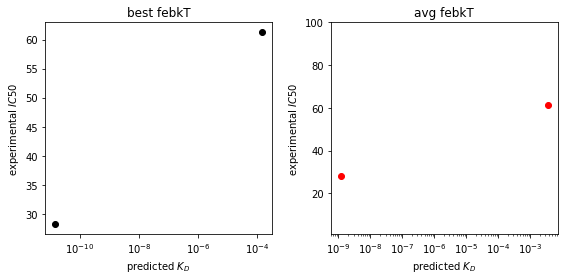

In [54]:
from matplotlib import pyplot as plt
%matplotlib inline

### make a scatter plot of predicted K_D and experimental IC50 -- for just THESE TWO
df_IC50_measured = df_activity[IC50_measured]

plt.figure(figsize=(8,4))

for s in df_IC50_measured.CID:
    print(s, '<--', new2old_CID[s])
    df_hits = df_results[df_results.identity.str.contains(new2old_CID[s])]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        print('Best scoring febkT:', best_febkT)

        avg_febkT = np.mean(df_hits["febkT"])
        print('Avg scoring febkT:', avg_febkT)

        # Convert to a VERY ROUGH IC50 measurement
        IC50 = float(list(df_IC50_measured[df_IC50_measured.CID == s]["IC50 (µM)"])[0])
        print('IC50', IC50)
        
        plt.subplot(1,2,1)
        plt.plot(febkT_to_KD(best_febkT), IC50, 'ko', label=s)
        #plt.text(febkT_to_KD(best_febkT), IC50, s)
        
        plt.subplot(1,2,2)
        plt.plot(febkT_to_KD(avg_febkT), IC50, 'ro', label=s)
        #plt.text(febkT_to_KD(avg_febkT), IC50, s)

plt.subplot(1,2,1)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('linear')
#plt.ylim(1,100)
plt.title('best febkT')

plt.subplot(1,2,2)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.ylim(1,100)
#plt.yscale('linear')
plt.title('avg febkT')

plt.tight_layout()
plt.show()

In [ ]:
## Are these in the latest master_pkl???

df_master = pd.read_pickle('../FEP/dataframes/master_FEP.pkl')

for s in df_activity[IC50_measured].CID:
    # print(s, '<--', new2old_CID[s])
    df_hits = df_master[df_master.identity.str.contains(new2old_CID[s])]
    if len(df_hits) > 0:
        print(df_hits)
        print('\n##########\n\n')
        # print(new2old_CID[s])


## AVG inhibition at 20 µM

In [6]:
# Find all that have "AVG % Inhibition at 20 uM" data -- make sure not negative!
avg20_measured = pd.notnull(df_activity["AVG % Inhibition at 20 uM"]) 
avg20_not_neg = df_activity["AVG % Inhibition at 20 uM"] > 0
df_activity_avg20 = df_activity[avg20_measured*avg20_not_neg]



/Users/vv/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


ALV-UNI-7ff1a6f9-47 <-- ÁLV-UNI-7ff-47
ALV-UNI-7ff1a6f9-45 <-- ÁLV-UNI-7ff-45
WAR-XCH-eb7b662f-2 <-- WAR-XCH-eb7-2
Best scoring febkT: -12.831381276923084
Avg scoring febkT: -12.831381276923084
WAR-XCH-b72a1bbc-9 <-- WAR-XCH-b72-9
Best scoring febkT: 1.5091270391741816
Avg scoring febkT: 1.5091270391741816
WAR-XCH-b72a1bbc-7 <-- WAR-XCH-b72-7
Best scoring febkT: -3.225703480824743
Avg scoring febkT: 0.3819343117762089
WAR-XCH-b72a1bbc-49 <-- WAR-XCH-b72-49
Best scoring febkT: 6.666060131607009
Avg scoring febkT: 6.666060131607009
WAR-XCH-b72a1bbc-16 <-- WAR-XCH-b72-16
Best scoring febkT: 1.135092755135716
Avg scoring febkT: 2.9989946715370612
WAR-XCH-b72a1bbc-15 <-- WAR-XCH-b72-15
Best scoring febkT: -2.393161781538474
Avg scoring febkT: 1.820366993971734
WAR-XCH-b72a1bbc-14 <-- WAR-XCH-b72-14
Best scoring febkT: -7.862138608860894
Avg scoring febkT: 0.5223953490432804
WAR-XCH-b6889685-30 <-- WAR-XCH-b68-30
Best scoring febkT: 6.530040599999978
Avg scoring febkT: 6.530040599999978
WAR-

/Users/vv/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


LON-WEI-b8d98729-33 <-- LON-WEI-b8d-33
LON-WEI-b8d98729-32 <-- LON-WEI-b8d-32
LON-WEI-b8d98729-31 <-- LON-WEI-b8d-31
LON-WEI-b8d98729-30 <-- LON-WEI-b8d-30
LON-WEI-b8d98729-29 <-- LON-WEI-b8d-29
LON-WEI-b8d98729-28 <-- LON-WEI-b8d-28
LON-WEI-b8d98729-27 <-- LON-WEI-b8d-27
LON-WEI-b8d98729-26 <-- LON-WEI-b8d-26
LON-WEI-b8d98729-25 <-- LON-WEI-b8d-25
LON-WEI-b8d98729-24 <-- LON-WEI-b8d-24
LON-WEI-b8d98729-23 <-- LON-WEI-b8d-23
LON-WEI-b8d98729-22 <-- LON-WEI-b8d-22
LON-WEI-b8d98729-21 <-- LON-WEI-b8d-21
LON-WEI-b8d98729-20 <-- LON-WEI-b8d-20
LON-WEI-b8d98729-2 <-- LON-WEI-b8d-2
LON-WEI-b8d98729-19 <-- LON-WEI-b8d-19
LON-WEI-b8d98729-18 <-- LON-WEI-b8d-18
LON-WEI-b8d98729-17 <-- LON-WEI-b8d-17
LON-WEI-b8d98729-16 <-- LON-WEI-b8d-16
LON-WEI-b8d98729-15 <-- LON-WEI-b8d-15
LON-WEI-b8d98729-14 <-- LON-WEI-b8d-14
LON-WEI-b8d98729-13 <-- LON-WEI-b8d-13
LON-WEI-b8d98729-12 <-- LON-WEI-b8d-12
LON-WEI-b8d98729-11 <-- LON-WEI-b8d-11
LON-WEI-b8d98729-10 <-- LON-WEI-b8d-10
LON-WEI-b8d98729-1 <-- LON-

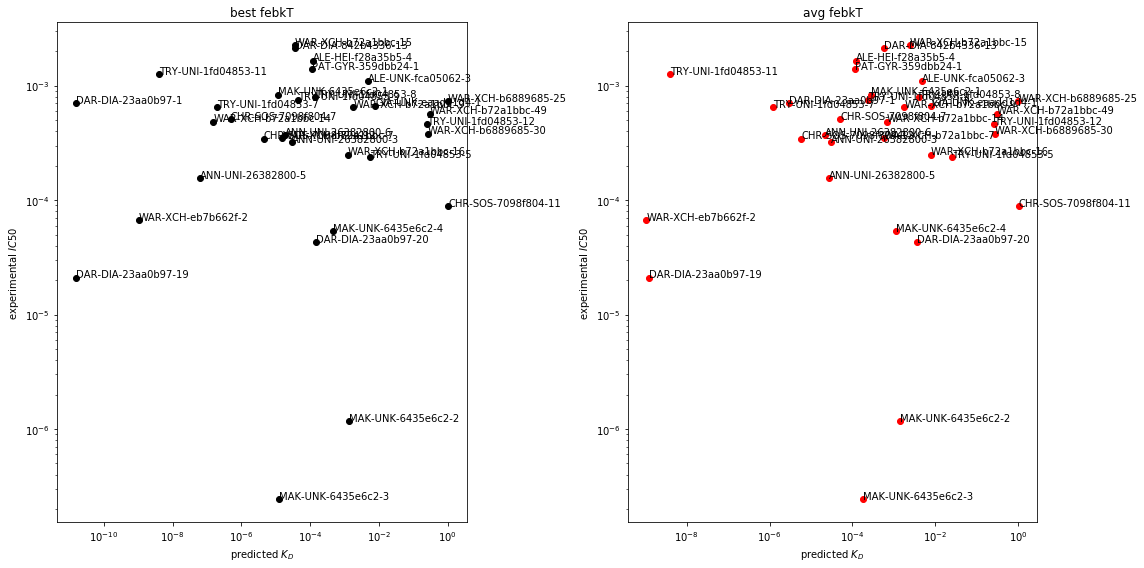

In [7]:


### make a scatter plot of predicted K_D and experimental IC50

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))

for s in df_activity_avg20.CID:
    print(s, '<--', new2old_CID[s])
    df_hits = df_results[df_results.identity.str.contains(new2old_CID[s])]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        print('Best scoring febkT:', best_febkT)

        avg_febkT = np.mean(df_hits["febkT"])
        print('Avg scoring febkT:', avg_febkT)

        # Convert to a VERY ROUGH IC50 measurement
        f = list(df_activity_avg20[df_activity_avg20.CID == s]["AVG % Inhibition at 20 uM"]/100.0)[0]
        Kd_activity_avg20 = 20.0*1e-6 * (1.0-f)/f  # in units M
        #print(Kd_activity_avg20)
        #print('\n##########\n\n')
        
        plt.subplot(1,2,1)
        plt.plot(febkT_to_KD(best_febkT), Kd_activity_avg20, 'ko', label=s)
        plt.text(febkT_to_KD(best_febkT), Kd_activity_avg20, s)
        
        plt.subplot(1,2,2)
        plt.plot(febkT_to_KD(avg_febkT), Kd_activity_avg20, 'ro', label=s)
        plt.text(febkT_to_KD(avg_febkT), Kd_activity_avg20, s)

plt.subplot(1,2,1)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('best febkT')

plt.subplot(1,2,2)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('avg febkT')

plt.tight_layout()
plt.show()

## Next, let's filter out only the v3 predictions

ALV-UNI-7ff1a6f9-47 <-- ÁLV-UNI-7ff-47
ALV-UNI-7ff1a6f9-45 <-- ÁLV-UNI-7ff-45
WAR-XCH-eb7b662f-2 <-- WAR-XCH-eb7-2
WAR-XCH-b72a1bbc-9 <-- WAR-XCH-b72-9
WAR-XCH-b72a1bbc-7 <-- WAR-XCH-b72-7
Best scoring febkT: -0.9918043826262632
Avg scoring febkT: -0.9918043826262632
WAR-XCH-b72a1bbc-49 <-- WAR-XCH-b72-49
WAR-XCH-b72a1bbc-16 <-- WAR-XCH-b72-16
Best scoring febkT: 2.5577223739832675
Avg scoring febkT: 4.802962373983263
WAR-XCH-b72a1bbc-15 <-- WAR-XCH-b72-15
Best scoring febkT: -2.393161781538474
Avg scoring febkT: -2.393161781538474
WAR-XCH-b72a1bbc-14 <-- WAR-XCH-b72-14
Best scoring febkT: 0.10031505836734844
Avg scoring febkT: 2.3444870991836746
WAR-XCH-b6889685-30 <-- WAR-XCH-b68-30
WAR-XCH-b6889685-25 <-- WAR-XCH-b68-25
AAR-POS-0daf6b7e-19 <-- None-19
AAR-POS-0daf6b7e-9 <-- None-9
TRY-UNI-714a760b-6 <-- TRY-UNI-714-6
TRY-UNI-714a760b-5 <-- TRY-UNI-714-5
TRY-UNI-714a760b-24 <-- TRY-UNI-714-24
TRY-UNI-714a760b-22 <-- TRY-UNI-714-22
TRY-UNI-714a760b-20 <-- TRY-UNI-714-20
JAN-GHE-83b26c

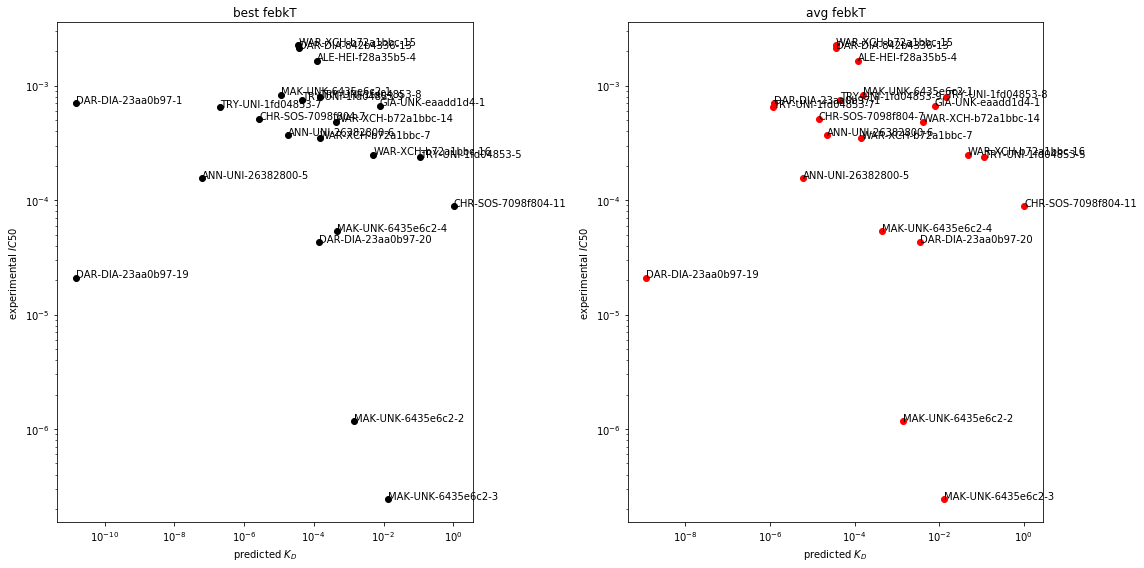

In [8]:
### make a scatter plot of predicted K_D and experimental IC50

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))

for s in df_activity_avg20.CID:
    print(s, '<--', new2old_CID[s])
    
    selection = df_results.identity.str.contains(new2old_CID[s]) * df_results.dataset.str.contains('v3')
    df_hits = df_results[selection]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        print('Best scoring febkT:', best_febkT)

        avg_febkT = np.mean(df_hits["febkT"])
        print('Avg scoring febkT:', avg_febkT)

        # Convert to a VERY ROUGH IC50 measurement
        f = list(df_activity_avg20[df_activity_avg20.CID == s]["AVG % Inhibition at 20 uM"]/100.0)[0]
        Kd_activity_avg20 = 20.0*1e-6 * (1.0-f)/f  # in units M
        #print(Kd_activity_avg20)
        #print('\n##########\n\n')
        
        plt.subplot(1,2,1)
        plt.plot(febkT_to_KD(best_febkT), Kd_activity_avg20, 'ko', label=s)
        plt.text(febkT_to_KD(best_febkT), Kd_activity_avg20, s)
        
        plt.subplot(1,2,2)
        plt.plot(febkT_to_KD(avg_febkT), Kd_activity_avg20, 'ro', label=s)
        plt.text(febkT_to_KD(avg_febkT), Kd_activity_avg20, s)

plt.subplot(1,2,1)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('best febkT')

plt.subplot(1,2,2)
plt.xlabel('predicted $K_D$')
plt.xscale('log')
plt.ylabel('experimental $IC50$')
plt.yscale('log')
plt.title('avg febkT')

plt.tight_layout()
plt.savefig('IC50-correlation-v3only.pdf')
plt.show()

### Another question: Could our FEP have enriched for the ACTIVEs?


/Users/vv/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


len(pred_Kd_actives_best) = 5
[1.05358639e-09 1.24544614e-05 1.43828856e-04 1.49163194e-11
 6.12855010e-08]
len(pred_Kd_inactives_best) = 20
[1.5644547757833535e-05, 3.596924146484856e-05, 1.516298905744072e-07, 8.077940934844104e-07, 4.4619091596881895e-05, 0.00014167264384105493, 1.986328936963077e-07, 3.928355323933316e-09, 7.037493503217927e-06, 0.00011644197172705463, 1.1757656538241654e-05, 0.00032483742582960006, 2.2641508925906878e-06, 3.7065461969548944e-05, 1.491631939720664e-11, 4.829343990022032e-07, 4.399372822552591e-06, 1.8494807934016807e-05, 3.040296743634517e-05, 0.00011981874107723044]


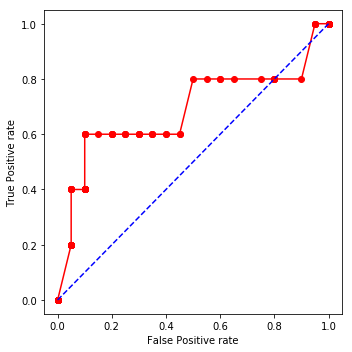

In [62]:
activity_threshold = 10.0  # percentage

# df_results = pd.read_pickle('results_051220_WL0.12.pkl')
df_results = pd.read_pickle('master_results_WL0.12.pkl')


# Find all that have "AVG % Inhibition at 20 uM" data above 10% -- we'll call this ACTIVE
avg20_measured = pd.notnull(df_activity["AVG % Inhibition at 20 uM"]) 
avg20_active = df_activity["AVG % Inhibition at 20 uM"] > activity_threshold
df_active = df_activity[avg20_measured*avg20_active]


# Find ones that were measured to be LESS than 10% -- we'll call this INACTIVE
#avg20_notmeasured = pd.isnull(df_activity["AVG % Inhibition at 20 uM"]) 
avg20_inactive = df_activity["AVG % Inhibition at 20 uM"] < activity_threshold
df_inactive = df_activity[avg20_measured*avg20_inactive]

pred_Kd_actives_best, pred_Kd_actives_avg = [], []
pred_Kd_inactives_best, pred_Kd_inactives_avg = [], []

for s in df_active.CID:
    #print(s, '<--', new2old_CID[s])
    selection = df_results.identity.str.contains(new2old_CID[s]) # * df_results.dataset.str.contains('v2')
    df_hits = df_results[selection]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        # print('Best scoring febkT:', best_febkT)
        pred_Kd_actives_best.append(febkT_to_KD(best_febkT))

        avg_febkT = np.mean(df_hits["febkT"])
        #print('Avg scoring febkT:', avg_febkT)
        pred_Kd_actives_avg.append(febkT_to_KD(avg_febkT))

for s in df_inactive.CID:
    #print(s, '<--', new2old_CID[s])
    selection = df_results.identity.str.contains(new2old_CID[s]) # * df_results.dataset.str.contains('v2')
    df_hits = df_results[selection]
    if len(df_hits) > 0:
        best_febkT = np.min(df_hits["febkT"])
        # print('Best scoring febkT:', best_febkT)
        pred_Kd_inactives_best.append(febkT_to_KD(best_febkT))
        avg_febkT = np.mean(df_hits["febkT"])
        #print('Avg scoring febkT:', avg_febkT)
        pred_Kd_inactives_avg.append(febkT_to_KD(avg_febkT))

# How many did we get?
print('len(pred_Kd_actives_best) =', len(pred_Kd_actives_best))
pred_Kd_actives_best = np.array(pred_Kd_actives_best)
print(pred_Kd_actives_best)

# How many did we get?
print('len(pred_Kd_inactives_best) =', len(pred_Kd_inactives_best))
print(pred_Kd_inactives_best)
pred_Kd_inactives_best = np.array(pred_Kd_inactives_best)


from matplotlib import pyplot as plt
%matplotlib inline

if (0):
    plt.figure(figsize=(12,8))
    counts, bin_edges = np.histogram(np.log10(pred_Kd_actives_best), bins=10)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    plt.plot(bin_centers, counts)

    counts, bin_edges = np.histogram(np.log10(pred_Kd_inactives_best), bins=100)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    plt.plot(bin_centers, counts, 'r-')
    plt.show()
    
if (1):
    
    # Build a ROC curve
    plt.figure(figsize=(5,5))
    
    log_pred_Kd_actives_best   = np.log10(pred_Kd_actives_best)
    log_pred_Kd_inactives_best = np.log10(pred_Kd_inactives_best
                                         )
    logKd_cutoffs = np.arange(-12.,+10., 0.1)
    TP_rate, FP_rate = [], []
    for logKd in logKd_cutoffs:
        
        ntrue = len(pred_Kd_actives_best[log_pred_Kd_actives_best < logKd])
        nactive =  len(pred_Kd_actives_best)
        TP_rate.append( float(ntrue)/float(nactive) )
        
        nfalse = len(pred_Kd_inactives_best[log_pred_Kd_inactives_best < logKd])
        ninactive =  len(pred_Kd_inactives_best)
        FP_rate.append( float(nfalse)/float(ninactive) )
        
        
    plt.plot(FP_rate, TP_rate, 'ro-')
    plt.plot([0,1],[0,1], 'b--')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.tight_layout()
    plt.show()


In [50]:
# Make of plot of the lambda schedule

lambda_schedule = """ 1  0.00  0.000 
 2  0.05  0.000 
 3  0.10  0.000 
 4  0.15  0.000 
 5  0.20  0.000 
 6  0.25  0.000 
 7  0.30  0.000 
 8  0.35  0.000 
 9  0.40  0.000 
10  0.45  0.000 
11  0.50  0.000 
12  0.55  0.000 
13   0.60  0.000 
14   0.65  0.000 
15   0.70  0.000 
16   0.75  0.000 
17   0.80  0.000 
18   0.85  0.000 
19   0.90  0.000 
20    0.950  0.000 
21   1.000  0.000 
22    1.000  0.100 
23    1.000  0.200 
24    1.000  0.300 
25    1.000  0.400 
26    1.000  0.450 
27    1.000  0.500 
28    1.000  0.550 
29    1.000  0.600 
30    1.000  0.630 
31   1.000  0.660 
32    1.000  0.690 
33    1.000  0.720 
34    1.000  0.750 
35    1.000  0.780 
36    1.000  0.810 
37    1.000  0.840 
38    1.000  0.880 
39    1.000  0.920 
40    1.000  1.000"""

indices, lam_coul, lam_vdw = [], [], []
for line in lambda_schedule.split('\n'):
    fields = line.strip().split()
    indices.append(int(fields[0]))
    lam_coul.append(float(fields[1]))
    lam_vdw.append(float(fields[2]))
    


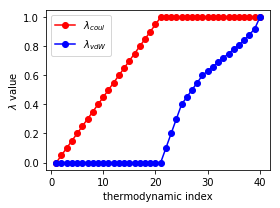

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,3))
plt.plot(indices, lam_coul, 'ro-', label='$\lambda_{coul}$')
plt.plot(indices, lam_vdw, 'bo-', label='$\lambda_{vdW}$')
plt.xlabel('thermodynamic index')
plt.ylabel('$\lambda$ value')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('lambda_schedule.pdf')
plt.show()


In [59]:
df_results = pd.read_pickle('master_results_WL0.12.pkl')
df_results = df_results.loc[(df_results.febkT < 0) & (df_results.febkT > -25)]
df_results = df_results.loc[df_results.error < 10]
df_results

,dataset,fah,identity,receptor,score,febkT,error,ns_RL,ns_L,wl_RL
139,MS0326_v3,PROJ14824/RUN580,MIH-UNI-6b9-8,Mpro-x0874-protein.pdb,-6.432608,-17.786012,1.437664,[45],"[200, 200, 200, 200, 200]",[0.11806]
51,MS0323_v3,PROJ14822/RUN237,DAR-DIA-23a-19,protein-0387.pdb,-5.253370,-17.088881,0.462442,[50],"[520, 410, 470, 410, 470]",[0.11806]
225,MS0326_v3,PROJ14823/RUN2582,SEL-UNI-842-3,Mpro-x1374-protein.pdb,-3.871179,-15.353482,0.295393,[65],"[200, 200, 200, 200, 200]",[0.11806]
23,MS0323_v3,PROJ14822/RUN32,ANT-DIA-045-3,protein-0387.pdb,-6.609026,-14.493425,2.883658,[52],"[710, 340, 450, 510, 530]",[0.11806]
142,MS0326_v3,PROJ14824/RUN293,GAB-REV-70c-9,Mpro-x0107-protein.pdb,-10.034979,-14.243884,0.182318,[55],"[200, 200, 200, 200]",[0.11806]
10,MS0326_v2,PROJ14723/RUN2855,√ÅLV-UNI-7ff-25,Mpro-x0395-protein.pdb,-5.541764,-14.116026,0.149549,[56],"[200, 200, 200, 200, 200]",[0.11806]
109,MS0326_v2,PROJ14723/RUN2799,√ÅLV-UNI-7ff-20,Mpro-x0540-protein.pdb,-3.537782,-13.921099,1.164327,"[21, 38, 36]","[200, 200, 200, 200, 200]","[0.11807, 0.11807, 0.11807]"
131,MS0323_v2,PROJ14722/RUN475,WAR-XCH-eb7-2,protein-0387.pdb,-4.555871,-12.831381,0.108680,[56],"[550, 470, 500, 500, 510]",[0.11806]
4,MS0323_v2,PROJ14722/RUN184,DAR-DIA-fc9-13,protein-0387.pdb,-5.448545,-12.811625,0.138848,[62],"[440, 480, 490, 370, 400]",[0.11806]
6,MS0326_v2,PROJ14724/RUN1648,DAR-DIA-23a-4,Mpro-x0305-protein.pdb,-4.213440,-12.784272,0.566222,[35],"[460, 500, 410, 410, 440]",[0.11806]
